<a href="https://colab.research.google.com/github/Keerthibalraj/Skin-cancer-segmentation/blob/main/Loading_image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the python library

In [2]:
! pip install kaggle

Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [9]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
! kaggle datasets download surajghuwalewala/ham1000-segmentation-and-classification

100% 2.59G/2.59G [00:28<00:00, 40.2MB/s]
100% 2.59G/2.59G [00:28<00:00, 96.1MB/s]


In [17]:
!unzip -u "/content/ham1000-segmentation-and-classification.zip" -d "/content/drive/MyDrive/kaggle"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029321_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029322_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029323_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029324_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029325_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029326_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029327_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029328_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029329_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029330_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029331_segmentation.png  
  inflating: /content/drive/MyDrive/kaggle/masks/ISIC_0029

In [1]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image_directory = '/content/drive/MyDrive/kaggle/images/'

SIZE = 128
image_dataset = []

images = os.listdir(image_directory)
for i, image_name in enumerate(images):
    if (image_name.split('.')[1] == 'jpg'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))




In [12]:
mask_directory = '/content/drive/MyDrive/kaggle/masks/'
mask_dataset = []
masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

Normalize images

In [13]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)

mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)


Sanity check

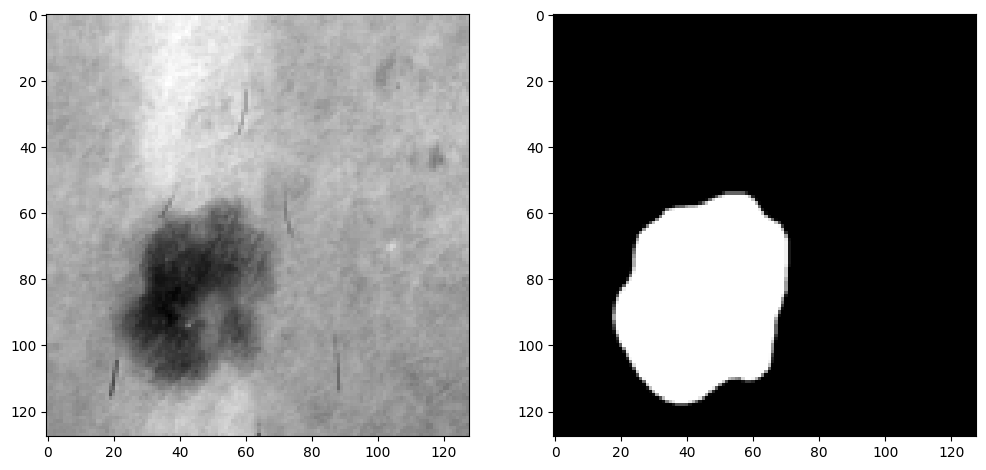

In [22]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (128,128)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (128,128)), cmap='gray')
plt.show()